## Assignment 3 - Dimensionality Reduction

This assignment is based on content discussed in module 6 and will work with the famous MNIST dataset, which is a set of images of handwritten digits https://en.wikipedia.org/wiki/MNIST_database.
The dataset has been provided to you in a .csv file.

## Learning outcomes

- Apply a Random Forest classification algorithm to MNIST dataset
- Perform dimensionality reduction of features using PCA and compare classification on the reduced dataset to that of original one
- Apply dimensionality reduction techniques: t-SNE and LLE

## Questions (15 points total)

__Question 1 (1 point).__ Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# YOUR CODE HERE
df = pd.read_csv('mnist_dataset.csv')
df.head()

,Unnamed: 0,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

array = df.values
X=array[:,2:]
Y=array[:,1]
X_train=X[:60000]
X_test=X[60000:]
Y_train=Y[:60000]
Y_test=Y[60000:]

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


__Question 2 (2 points).__ Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import time


time_start_1 = time.time()
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train,Y_train)
print('Random Forest classifier done! Time elapsed: {} seconds'.format(time.time()- time_start_1))

Random Forest classifier done! Time elapsed: 3.4497687816619873 seconds


In [4]:
#evaluate the resulting model
results = cross_val_score(model, X_test, Y_test, cv=5)
print(results.mean())

0.9013121996441174


__Question 3 (4 points).__ Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [5]:
# YOUR CODE HERE
from sklearn.decomposition import PCA

In [6]:
pca_full = PCA()
pca_result = pca_full.fit_transform(X_train)

cumsum = np.cumsum(pca_full.explained_variance_ratio_)
d_img = np.argmax(cumsum >= 0.95) + 1

print('The number of dimensions required to preserve 95% of MNIST data set variance is {}.'.format(d_img))

The number of dimensions required to preserve 95% of MNIST data set variance is 330.


In [8]:
# fit and transform data 
pca95 = PCA(.95)
pca95.fit(X_train)
X_train_pca = pca95.transform(X_train)
X_test_pca = pca95.transform(X_test)

In [9]:
#Train a new random forest classifier on the reduced dataset
time_start_2= time.time()
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train_pca,Y_train)
print('New Reduced PCA Random Forest classifier done! Time elapsed: {} seconds'.format(time.time()- time_start_2))

New Reduced PCA Random Forest classifier done! Time elapsed: 11.679779291152954 seconds


In [10]:
#evaluate the resulting model
results = cross_val_score(model, X_test_pca, Y_test, cv=5)
print(results.mean())

0.7983022937067135


### Result 
#### The number of dimensions required to preserve 95% varaince ratio is 330
#### Originial Random Forest Classifier took 3.45s, Accuracy 90.13%
#### New Reduced Random Forest Classifier took 11.67s, Accuracy 79.83%


__Question 4 (4 points).__ Use t-SNE to reduce the MNIST dataset, show result graphically.

In [29]:
# 
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_result = tsne.fit_transform(X_train[:5000]) # took first 5000 as example because it takes too long.
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.206s...
[t-SNE] Computed neighbors for 5000 samples in 29.415s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 5.844708
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.978226
[t-SNE] Error after 300 iterations: 2.160695
t-SNE done! Time elapsed: 68.22361254692078 seconds


C:\Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


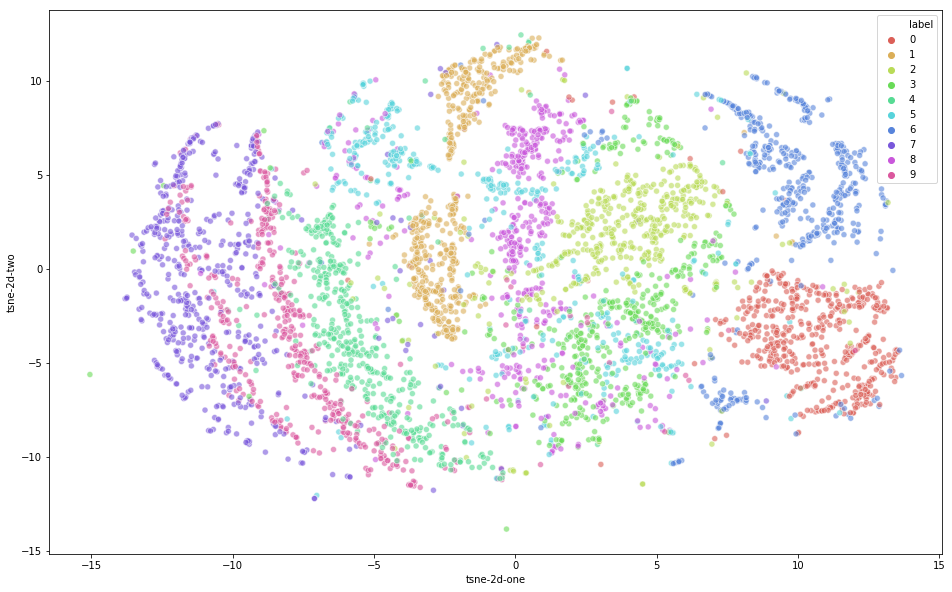

In [30]:
mnist_df_subset=df[:5000]
mnist_df_subset['tsne-2d-one'] = tsne_result[:, 0]
mnist_df_subset['tsne-2d-two'] = tsne_result[:, 1]

plt.figure(figsize=(16,10))
sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='label',
               palette=sns.color_palette('hls', 10),
               data=mnist_df_subset,
               alpha=0.6)

__Question 5 (4 points).__ Compare with other dimensionality methods: _Locally Linear Embedding_ (LLE) or _Multidimensional scaling_ (MDS).

In [31]:
# YOR CODE HERE
from sklearn.manifold import MDS
time_start = time.time()
mds_model = MDS(verbose=1,n_components = 2, max_iter=100, n_init=1)
mds_result = mds_model.fit_transform(X_train[:5000]) # took first 5000 as example because it takes too long.
print('MDS done! Time elapsed: {} seconds'.format(time.time()-time_start))

MDS done! Time elapsed: 73.96140766143799 seconds


C:\Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


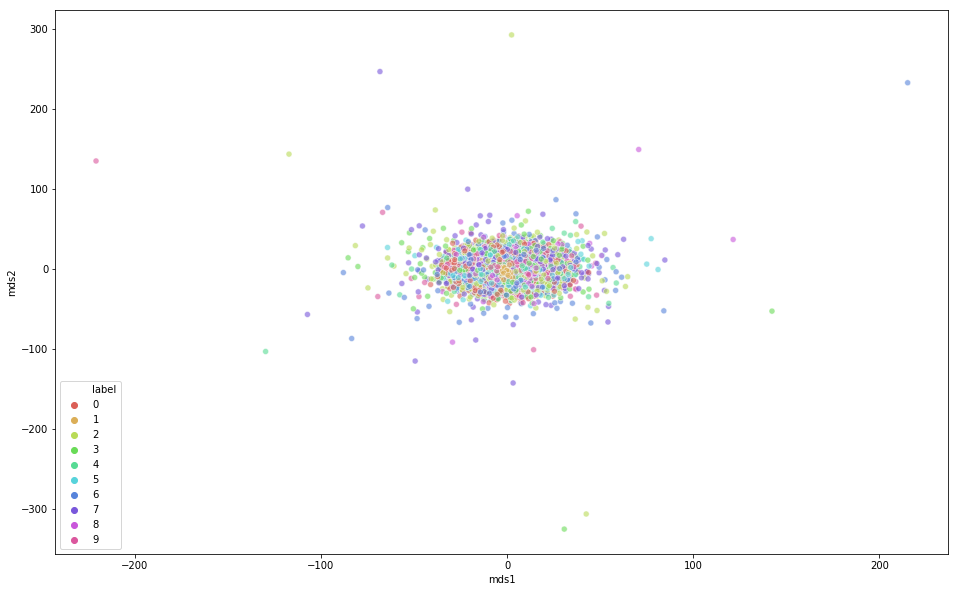

In [32]:
mnist_df_subset=df[:5000]
mnist_df_subset['mds1'] = mds_result[:, 0]
mnist_df_subset['mds2'] = mds_result[:, 1]


plt.figure(figsize=(16,10))
sns.scatterplot(x='mds1', y='mds2', hue='label',
               palette=sns.color_palette('hls', 10),
               data=mnist_df_subset,
               alpha=0.6)
